In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [3]:
data = pd.read_csv('moore.csv', header=None).values

In [5]:
X = data[:, 0].reshape(-1, 1)
Y = data[:, 1].reshape(-1, 1)

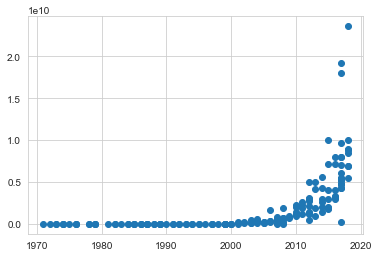

In [7]:
# Plot the date - it is exponential
plt.scatter(X, Y)

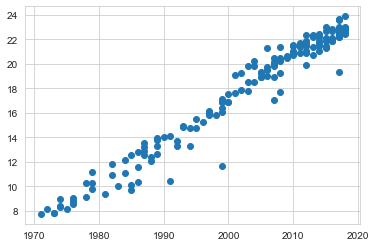

In [8]:
# Log Transform
Y = np.log(Y)
plt.scatter(X, Y)

In [9]:
# Scale and Center both the x and y axes
mx = X.mean()  # mean
sx = X.std()   # variance
my = Y.mean()
sy = Y.std()
X = (X - mx) / sx  # Z-score
Y = (Y - my) / sy

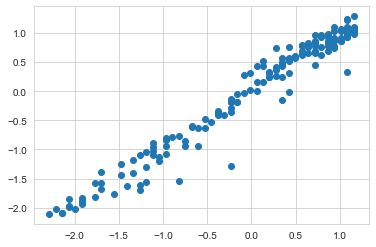

In [10]:
plt.scatter(X, Y)

In [11]:
# Cast to float32
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [12]:
# Create the Linear Regression Model
model = nn.Linear(1, 1)

In [13]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)

In [14]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [16]:
type(inputs)

torch.Tensor

In [18]:
# TRAIN THE MODEL
n_epochs = 100
losses = []
for i in range(n_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # keep the loss to plot it later
    losses.append(loss.item())
    
    # Backward and Optimize
    loss.backward()
    optimizer.step()
    
    print(f'Epoch {i+1}/{n_epochs},  Loss: {loss.item():.4f}')

Epoch 1/100,  Loss: 0.0441
Epoch 2/100,  Loss: 0.0431
Epoch 3/100,  Loss: 0.0424
Epoch 4/100,  Loss: 0.0418
Epoch 5/100,  Loss: 0.0412
Epoch 6/100,  Loss: 0.0408
Epoch 7/100,  Loss: 0.0404
Epoch 8/100,  Loss: 0.0401
Epoch 9/100,  Loss: 0.0398
Epoch 10/100,  Loss: 0.0396
Epoch 11/100,  Loss: 0.0394
Epoch 12/100,  Loss: 0.0393
Epoch 13/100,  Loss: 0.0391
Epoch 14/100,  Loss: 0.0390
Epoch 15/100,  Loss: 0.0389
Epoch 16/100,  Loss: 0.0389
Epoch 17/100,  Loss: 0.0388
Epoch 18/100,  Loss: 0.0388
Epoch 19/100,  Loss: 0.0387
Epoch 20/100,  Loss: 0.0387
Epoch 21/100,  Loss: 0.0386
Epoch 22/100,  Loss: 0.0386
Epoch 23/100,  Loss: 0.0386
Epoch 24/100,  Loss: 0.0386
Epoch 25/100,  Loss: 0.0386
Epoch 26/100,  Loss: 0.0385
Epoch 27/100,  Loss: 0.0385
Epoch 28/100,  Loss: 0.0385
Epoch 29/100,  Loss: 0.0385
Epoch 30/100,  Loss: 0.0385
Epoch 31/100,  Loss: 0.0385
Epoch 32/100,  Loss: 0.0385
Epoch 33/100,  Loss: 0.0385
Epoch 34/100,  Loss: 0.0385
Epoch 35/100,  Loss: 0.0385
Epoch 36/100,  Loss: 0.0385
E

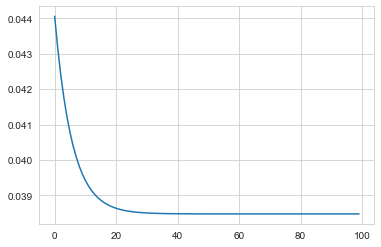

In [19]:
# Plot the Loss per iteration
plt.plot(losses)

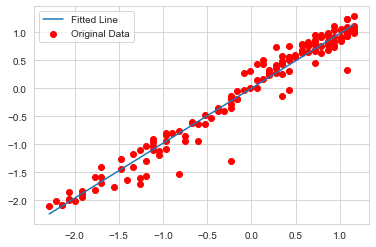

In [20]:
# Plot the graph
predicted = model(inputs).detach().numpy()   # this converts torch tensor into numpy array, since we can't plot torch tensor in matplotlib
plt.scatter(X, Y, label='Original Data', color='red')
plt.plot(X, predicted, label='Fitted Line')
plt.legend()

[[-2.2415085 ]
 [-2.1696599 ]
 [-2.0978112 ]
 [-2.0978112 ]
 [-2.0259626 ]
 [-2.0259626 ]
 [-2.0259626 ]
 [-1.9541137 ]
 [-1.882265  ]
 [-1.882265  ]
 [-1.882265  ]
 [-1.7385676 ]
 [-1.7385676 ]
 [-1.6667188 ]
 [-1.6667188 ]
 [-1.6667188 ]
 [-1.5230215 ]
 [-1.4511727 ]
 [-1.4511727 ]
 [-1.3793241 ]
 [-1.3074753 ]
 [-1.3074753 ]
 [-1.2356267 ]
 [-1.2356267 ]
 [-1.2356267 ]
 [-1.1637781 ]
 [-1.1637781 ]
 [-1.1637781 ]
 [-1.0919293 ]
 [-1.0919293 ]
 [-1.0919293 ]
 [-1.0919293 ]
 [-1.0200807 ]
 [-1.0200807 ]
 [-0.9482318 ]
 [-0.9482318 ]
 [-0.9482318 ]
 [-0.9482318 ]
 [-0.8763831 ]
 [-0.8045344 ]
 [-0.8045344 ]
 [-0.7326857 ]
 [-0.7326857 ]
 [-0.66083705]
 [-0.66083705]
 [-0.58898836]
 [-0.58898836]
 [-0.5171396 ]
 [-0.22974482]
 [-0.5171396 ]
 [-0.44529092]
 [-0.37344223]
 [-0.37344223]
 [-0.37344223]
 [-0.3015935 ]
 [-0.22974482]
 [-0.22974482]
 [-0.15789612]
 [-0.15789612]
 [-0.22974482]
 [-0.22974482]
 [-0.22974482]
 [-0.15789612]
 [-0.08604742]
 [-0.08604742]
 [-0.01419872]
 [ 0.12949

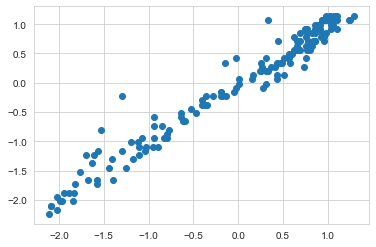

In [21]:
# Another way
with torch.no_grad():
    out = model(inputs).numpy()
plt.scatter(Y, out)
print(out)

In [22]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.9805631]] [-6.381159e-06]


In [23]:
a = w[0, 0] * sy / sx

In [24]:
a

0.3416796931712892

In [26]:
print('Time to double: ', np.log(2) / a)

Time to double:  2.0286461104156404
